# 收集

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_image = pd.read_csv('image-predictions.tsv', sep='\t')
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 原读法：
# df_tweet = pd.read_json('tweet_json.txt', lines=True, dtype=False)
# 审阅：直接把它读取进dataframe其实可以看出有些列中每个值本身是个字典，这样数据本身就存在结构性的问题，
# 这里我们可以按照如下步骤来读取
# 1，打开文件（如with...open
# 2， 申明一个dataframe/list
# 3， 遍历文件中所有数据，然后一条一条append到dataframe/存成字典append到list
# 4， 如果你是申明list，在最后把list中的数据传到dataframe
import json
with open('tweet_json.txt') as f:
    tweet = []
    for line in f:
        tweet.append(json.loads(line))

df_tweet = pd.DataFrame(tweet, columns=['id', 'retweet_count', 'favorite_count'])

# 评估

In [4]:
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [5]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [9]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [11]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 质量
##### `df_archive` 表格
- 含有转发的数据大部分为空值
- 日期时间的格式错误
- tweet_id应为字符串类型
- 分子有异常值
- 分母有异常值
- 狗的地位有空值


##### `df_tweet` 表格
- tweet_id 应为字符串类型

##### `df_image` 表格
- id应为字符串类型

### 清洁度
-  `df_archive` 表格中的狗地位应为一列
-  数据分布在三个表中

# 清理

In [12]:
archive_clean = df_archive.copy()
tweet_clean = df_tweet.copy()
image_clean = df_image.copy()

## 清洁度

### 狗地位不在一列
##### 定义
狗地位应置于一列，将四列数据合并为一列

#### 代码

In [13]:
# 使用melt函数将四列数据转置成一列数据
archive_status = pd.melt(archive_clean, id_vars=list(archive_clean.columns)[:13],value_vars=list(archive_clean.columns)[13:],
       var_name='status',value_name='status_values')
archive_status.status_values.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: status_values, dtype: int64

In [14]:
archive_status = archive_status.drop(archive_status.query('status_values=="None"').index)[['tweet_id','status_values']]

In [15]:
archive_clean = pd.merge(archive_clean,archive_status,how='left',on='tweet_id')

In [16]:
archive_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True,axis=1)

#### 测试

In [17]:
archive_clean.status_values.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: status_values, dtype: int64

### 数据分布在三个表中
#### 定义
按照tweet_id合并三个表

#### 代码

In [18]:
archive_clean = pd.merge(archive_clean,image_clean,on='tweet_id')
archive_clean = pd.merge(archive_clean,tweet_clean, left_on='tweet_id', right_on='id')
archive_clean.drop(columns='id',inplace=True)

#### 测试

In [19]:
list(archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'status_values',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

In [20]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 27 columns):
tweet_id                      2086 non-null int64
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2086 non-null object
source                        2086 non-null object
text                          2086 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2086 non-null object
rating_numerator              2086 non-null int64
rating_denominator            2086 non-null int64
name                          2086 non-null object
status_values                 334 non-null object
jpg_url                       2086 non-null object
img_num                       2086 non-null int64
p1                            2086 non-null object
p1_conf                       2086 no

## 质量

### 转发的数据大部分为空

In [21]:
archive_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                             'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

### twitter id应为字符串

In [22]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

### 日期时间的格式错误

In [23]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### 测试

In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 22 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null datetime64[ns]
source                2086 non-null object
text                  2086 non-null object
expanded_urls         2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
status_values         334 non-null object
jpg_url               2086 non-null object
img_num               2086 non-null int64
p1                    2086 non-null object
p1_conf               2086 non-null float64
p1_dog                2086 non-null bool
p2                    2086 non-null object
p2_conf               2086 non-null float64
p2_dog                2086 non-null bool
p3                    2086 non-null object
p3_conf               2086 non-null float64
p3_dog                2086 non-null bool
retweet_count         2086 non-n

### 分子分母有不合规的评分

#### 定义：因为视觉评估后发现分子值主要分布在[1-14]的区间，所以刨除此区间以外的异常值，分母只保留10

#### 代码

In [25]:
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(int)

In [26]:
archive_clean = archive_clean.query('rating_numerator > 0 and rating_numerator < 15 and rating_denominator == 10')

#### 测试

In [36]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2085
Data columns (total 22 columns):
tweet_id              2060 non-null object
timestamp             2060 non-null datetime64[ns]
source                2060 non-null object
text                  2060 non-null object
expanded_urls         2060 non-null object
rating_numerator      2060 non-null int64
rating_denominator    2060 non-null int64
name                  2060 non-null object
status_values         333 non-null object
jpg_url               2060 non-null object
img_num               2060 non-null int64
p1                    2060 non-null object
p1_conf               2060 non-null float64
p1_dog                2060 non-null bool
p2                    2060 non-null object
p2_conf               2060 non-null float64
p2_dog                2060 non-null bool
p3                    2060 non-null object
p3_conf               2060 non-null float64
p3_dog                2060 non-null bool
retweet_count         2060 non-n

# 可视化

In [27]:
import matplotlib.pyplot as plt
% matplotlib inline

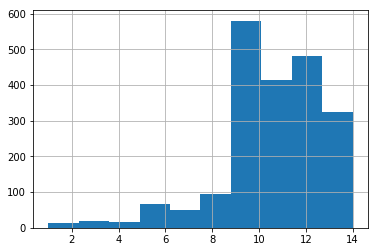

In [28]:
archive_clean.rating_numerator.hist();

In [29]:
archive_clean.rating_numerator.mean()

10.6126213592233

**结论一：分子评分数的平均分是10.6分。**

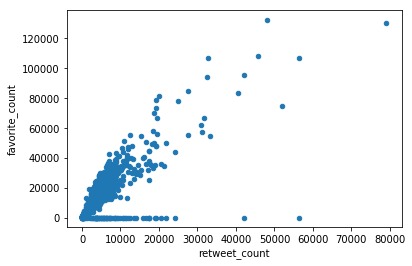

In [30]:
archive_clean.plot(x='retweet_count', y='favorite_count', kind='scatter');

**结论二：转发和喜欢数成正相关。**

In [31]:
archive_clean.groupby('status_values').retweet_count.mean()

status_values
doggo      7584.987500
floofer    4745.500000
pupper     2587.045249
puppo      6923.000000
Name: retweet_count, dtype: float64

**结论三：被评为doggo的狗狗平均转发数最高，达7584,其次是puppo,达6923。**

In [32]:
archive_clean.groupby('p1_dog').p1_conf.mean()

p1_dog
False    0.540967
True     0.614344
Name: p1_conf, dtype: float64

**结论四：从图片识别为狗的可信度平均是0.62，识别不出的可信度均值是0.54。**

In [33]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)